In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set where alpha = 1
condition = lambda _: _[0]**2 + _[1]**2 < 1

In [3]:
sizeX,sizeY = 1,1
nX,nY = 10,10
subX,subY = 10,10
v = []
for x,y in [(x,y) for x in range(nX*subX) for y in range(nY*subY)]:
        v.append((sizeX/nX*(x+0.5)/subX,
                  sizeY/nY*(y+0.5)/subY))
V = []
for x,y in [(x,y) for x in range(nX) for y in range(nY)]:
        V.append((sizeX/nX*(x+0.5),
                  sizeY/nY*(y+0.5)))
m = np.array([1 if condition(_) else 0 for _ in v]).reshape([nX*subX,nY*subY])
M = np.array([1 if condition(_) else 0 for _ in V]).reshape([nX,nY])
M_ = np.zeros_like(M)
s = 0
for i,j in [(i,j) for i in range(nX) for j in range(nY)]:
    x=sum(m[x,y] for x in range(i*subX,(i+1)*subX) for y in range(j*subY,(j+1)*subY)) / (subX*subY)
    s+=x*(sizeX/nX*sizeY/nY)
#     print(x) # OpenFOAM alpha output

---

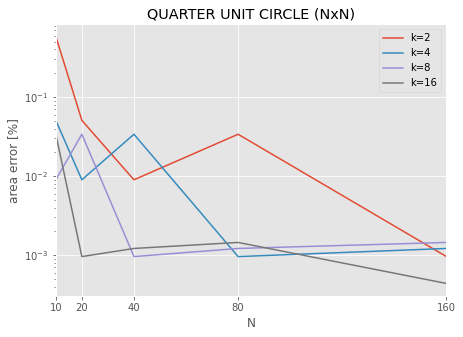

In [4]:
plt.figure(figsize=(7,5))
plt.style.use('ggplot')
l = []
a = np.pi/4
for k in [2,4,8,16]:
        for _ in (n:=[10,20,40,80,160]):
                sizeX,sizeY = 1,1 # later replace with n, cause map
                nX,nY = _,_
                subX,subY = k,k
                v = []
                for x,y in [(x,y) for x in range(nX*subX) for y in range(nY*subY)]:
                        v.append((sizeX/nX*(x+0.5)/subX,
                                sizeY/nY*(y+0.5)/subY))
                V = []
                for x,y in [(x,y) for x in range(nX) for y in range(nY)]:
                        V.append((sizeX/nX*(x+0.5),
                                sizeY/nY*(y+0.5)))
                condition = lambda _: _[0]**2 + _[1]**2 < 1
                m = np.array([1 if condition(_) else 0 for _ in v]).reshape([nX*subX,nY*subY])
                M = np.array([1 if condition(_) else 0 for _ in V]).reshape([nX,nY])
                M_ = np.zeros_like(M)
                s = 0
                for i,j in [(i,j) for i in range(nX) for j in range(nY)]:
                        x=sum(m[x,y] for x in range(i*subX,(i+1)*subX) for y in range(j*subY,(j+1)*subY)) / (subX*subY)
                        s+=x*(sizeX/nX*sizeY/nY)

                l.append(abs(100*(s-a)/a))
        plt.plot(n,l,label=f'k={k}')
        l=[]
plt.axhline(0,color='k')
plt.legend()
plt.xlabel('N')
plt.ylabel('area error [%]')
plt.yscale('log')
plt.xlim(n[0],n[-1])
plt.xticks(n)
plt.title('QUARTER UNIT CIRCLE (NxN)')
plt.savefig('error',dpi=300,facecolor='white')